# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,log_loss

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
df_credit=pd.read_excel('GermanCredit.xlsx')
df_credit.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [4]:
df_credit['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [5]:
df_credit.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [6]:
df_credit.dtypes

Creditability               int64
CreditAmount                int64
DurationOfCreditInMonths    int64
dtype: object

# 2. Check how many records do we have


In [7]:
df_credit.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

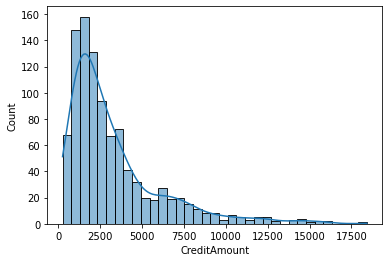

In [8]:
sns.histplot(df_credit['CreditAmount'],kde=True)
plt.show()

# 3b. Create creditability dataframe

In [13]:
AmountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
Amount_Intervals = [(AmountIntervalsPoints[i] + int(i != 0), AmountIntervalsPoints[i + 1]) for i in np.arange(len(AmountIntervalsPoints) - 1)]
creditability = pd.DataFrame(Amount_Intervals, columns=['intervalLeftSide','intervalRightside'])
creditability

,intervalLeftSide,intervalRightside
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [15]:
credibility0 = []
credibility1 = []
def creditability_append(x, credit):
    for j in range(len(creditability)):
        k = 0
        count = 0
        for i in range(len(df_credit)):
            CreditAmount = df_credit.iloc[i,1]
            if((CreditAmount >= creditability.iloc[j,k]) & (CreditAmount <= creditability.iloc[j,k+1])):
                if(df_credit.iloc[i,0] == credit):
                    count = count + 1
        x.append(count)
creditability_append(credibility0, credit = 0)
creditability_append(credibility1, credit = 1)
tot = list( np.array(credibility0) + np.array(credibility1))
df1 = pd.DataFrame(zip(credibility0, credibility1, tot), columns = ['credibility0','credibility1','total'])
df1

,credibility0,credibility1,total
0,3,15,18
1,34,64,98
2,51,139,190
3,33,93,126
4,26,79,105
5,75,200,275
6,34,68,102
7,20,26,46
8,21,14,35
9,3,2,5


In [111]:
df2 = pd.concat([df, df1], axis=1)
df2.head()

,Credibiliity0,Credibiliity1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [16]:
df2 = pd.concat([creditability, df1], axis = 1)
df2

,intervalLeftSide,intervalRightside,credibility0,credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

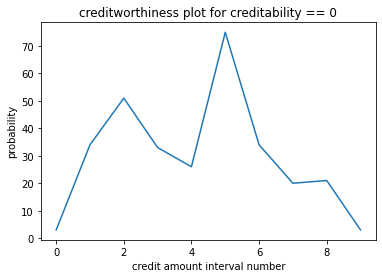

In [17]:
sns.lineplot(x = df2.index, y = df2['credibility0'])
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title('creditworthiness plot for creditability == 0')
plt.show()

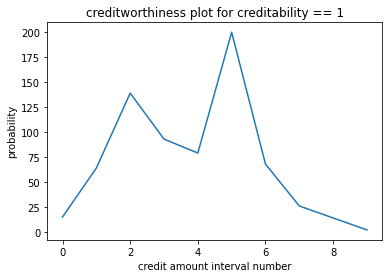

In [18]:
sns.lineplot(x = df2.index, y = df2['credibility1'])
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title('creditworthiness plot for creditability == 1')
plt.show()

# 6. Prepare input data for the model

In [20]:
y = df_credit['Creditability']
X = df_credit.drop('Creditability', axis = 1)
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (700, 3)
y_train (700,)
X_test (300, 3)
y_test (300,)


In [27]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.584928
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:                 0.04055
Time:                        15:55:58   Log-Likelihood:                -409.45
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 3.052e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8847      0.085     10.358      0.000       0.717       1.052
x1            -0.0587      0.

# 8. Test accuracy calculation

In [30]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.6933333333333334

In [22]:
logreg.params

const    0.884671
x1      -0.058678
x2      -0.437194
dtype: float64

# 9. Build a confusion matrix

In [25]:
y_pred_prob = logreg.predict(X_test)
pd.Series(y_pred_prob).head()

0   0.667759
1   0.801391
2   0.767848
3   0.757248
4   0.736022
dtype: float64

In [29]:
y_pred = [ 0 if x <= 0.5 else 1 for x in y_pred_prob]
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 10,  81],
       [ 11, 198]], dtype=int64)

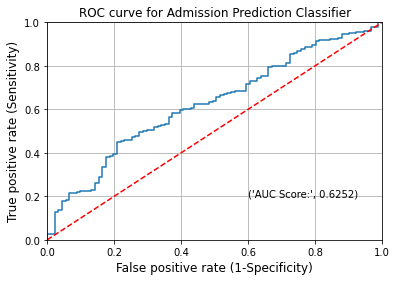

In [31]:
#y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
plt.title('ROC curve for Admission Prediction Classifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

# add the AUC score to the plot
plt.text(x = 0.6, y = 0.2, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

<AxesSubplot:ylabel='Count'>

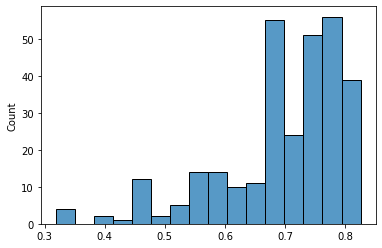

In [32]:
sns.histplot(y_pred_prob)